In [1]:
import numpy as np
import os
import pandas as pd 
from tqdm import tqdm #for progress bars 

In [2]:
input_file_path=r'T:\TOSHITH\PROGRAMMING\music_genere_classification\features_30_sec.csv'

In [3]:
data=pd.read_csv(input_file_path)
lables=data['label']
features_to_drop=['filename', 'length','label']
data = data.drop(features_to_drop, axis=1)
data_features=data.columns.tolist()
data_features

['chroma_stft_mean',
 'chroma_stft_var',
 'rms_mean',
 'rms_var',
 'spectral_centroid_mean',
 'spectral_centroid_var',
 'spectral_bandwidth_mean',
 'spectral_bandwidth_var',
 'rolloff_mean',
 'rolloff_var',
 'zero_crossing_rate_mean',
 'zero_crossing_rate_var',
 'harmony_mean',
 'harmony_var',
 'perceptr_mean',
 'perceptr_var',
 'tempo',
 'mfcc1_mean',
 'mfcc1_var',
 'mfcc2_mean',
 'mfcc2_var',
 'mfcc3_mean',
 'mfcc3_var',
 'mfcc4_mean',
 'mfcc4_var',
 'mfcc5_mean',
 'mfcc5_var',
 'mfcc6_mean',
 'mfcc6_var',
 'mfcc7_mean',
 'mfcc7_var',
 'mfcc8_mean',
 'mfcc8_var',
 'mfcc9_mean',
 'mfcc9_var',
 'mfcc10_mean',
 'mfcc10_var',
 'mfcc11_mean',
 'mfcc11_var',
 'mfcc12_mean',
 'mfcc12_var',
 'mfcc13_mean',
 'mfcc13_var',
 'mfcc14_mean',
 'mfcc14_var',
 'mfcc15_mean',
 'mfcc15_var',
 'mfcc16_mean',
 'mfcc16_var',
 'mfcc17_mean',
 'mfcc17_var',
 'mfcc18_mean',
 'mfcc18_var',
 'mfcc19_mean',
 'mfcc19_var',
 'mfcc20_mean',
 'mfcc20_var']

In [4]:
data.shape,lables.shape

((1000, 57), (1000,))

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn 

# Read data
data = pd.read_csv(input_file_path)
labels = data['label']

# Drop unwanted columns
features_to_drop = ['filename', 'length', 'label']
data = data.drop(features_to_drop, axis=1)

# Encode labels if they are not numbers
if not pd.api.types.is_numeric_dtype(labels):
    le = LabelEncoder()
    labels_encoded = le.fit_transform(labels)
else:
    labels_encoded = labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.3)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

# Evaluate
print("Accuracy:", rf.score(X_test, y_test))


Accuracy: 0.7


Text(50.722222222222214, 0.5, 'actual')

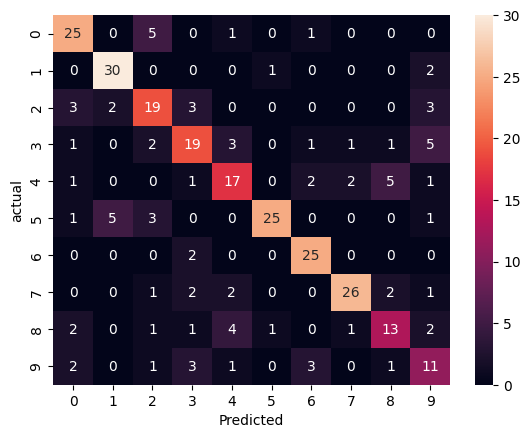

In [6]:
y_predicted=rf.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)

plt.figure()

sn.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("actual")

In [12]:
from xgboost import XGBClassifier

# Determine number of unique classes
num_classes = 10

model = XGBClassifier(
    objective='multi:softprob',
    num_class=num_classes,
    n_estimators=2000,
    max_depth=200,                   # Reduced from 200
    learning_rate=0.001,             # Increased from 0.01
    subsample=0.8,
    colsample_bytree=0.8,
    min_child_weight=1,            # Added
    gamma=0,                       # Added
    reg_alpha=0,                   # Added
    reg_lambda=1,                  # Added
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.001, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=200,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=2000,
              n_jobs=None, num_class=10, ...)

In [15]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred, target_names=list(le.classes_)))

Accuracy: 0.7066666666666667
              precision    recall  f1-score   support

       blues       0.67      0.75      0.71        32
   classical       0.86      0.94      0.90        33
     country       0.67      0.60      0.63        30
       disco       0.73      0.58      0.64        33
      hiphop       0.64      0.55      0.59        29
        jazz       0.88      0.80      0.84        35
       metal       0.81      0.93      0.86        27
         pop       0.79      0.79      0.79        34
      reggae       0.55      0.64      0.59        25
        rock       0.33      0.36      0.35        22

    accuracy                           0.71       300
   macro avg       0.69      0.69      0.69       300
weighted avg       0.71      0.71      0.71       300



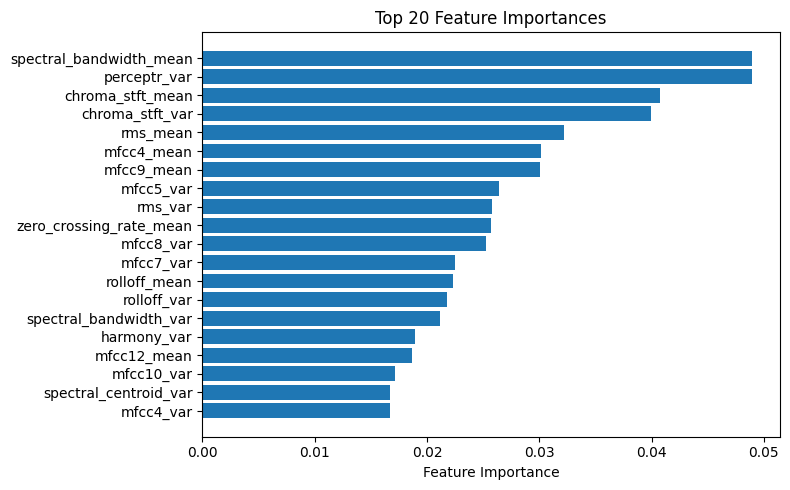

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances and names
importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = np.argsort(importances)[::-1]

# Select top N features
top_n = 20
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_idx][:top_n], align='center')
plt.yticks(range(top_n), feature_names[sorted_idx][:top_n])
plt.xlabel("Feature Importance")
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()  # Most important at top
plt.tight_layout()
plt.show()